# Coursework 1 #

Data Source: https://www.kaggle.com/datasets/fedesoriano/company-bankruptcy-prediction

## Import the neccessary Libraries ##

In [66]:
%matplotlib inline

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns              
import warnings     
from matplotlib import pyplot as plt    
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, f_classif
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree

pd.set_option("display.max_columns", None)
warnings.simplefilter('ignore', category=UserWarning)  

## Importing the Data ##

In [68]:
df = pd.read_csv("Company Bankruptcy Data.csv")
df

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0             1                                           0.370594          
1             1                                           0.464291          
2             1                                           0.426071          
3             1                                           0.399844          
4             1                                           0.465022          
...         ...                                                ...          
6814          0                                           0.493687          
6815          0                                           0.475162          
6816          0                                           0.472725          
6817          0                                           0.506264          
6818          0                                           0.493053          

       ROA(A) before interest and % after tax  \
0                                    0.424389   
1                                    0.538214   
2                                    0.499019   
3                                    0.451265   
4                                    0.538432   
...                                       ...   
6814                                 0.539468   
6815                                 0.538269   
6816                                 0.533744   
6817                                 0.559911   
6818                                 0.570105   

       ROA(B) before interest and depreciation after tax  \
0                                              0.405750    
1                                              0.516730    
2                                              0.472295    
3                                              0.457733    
4                                              0.522298    
...                                                 ...    
6814                                           0.543230    
6815                                           0.524172    
6816                                           0.520638    
6817                                           0.554045    
6818                                           0.549548    

       Operating Gross Margin   Realized Sales Gross Margin  \
0                    0.601457                      0.601457   
1                    0.610235                      0.610235   
2                    0.601450                      0.601364   
3                    0.583541                      0.583541   
4                    0.598783                      0.598783   
...                       ...                           ...   
6814                 0.604455                      0.604462   
6815                 0.598308                      0.598308   
6816                 0.610444                      0.610213   
6817                 0.607850                      0.607850   
6818                 0.627409                      0.627409   

       Operating Profit Rate   Pre-tax net Interest Rate  \
0                   0.998969                    0.796887   
1                   0.998946                    0.797380   
2                   0.998857                    0.796403   
3                   0.998700                    0.796967   
4                   0.998973                    0.797366   
...                      ...                         ...   
6814                0.998992                    0.797409   
6815                0.998992                    0.797414   
6816                0.998984                    0.797401   
6817                0.999074                    0.797500   
6818                0.998080                    0.801987   

       After-tax net Interest Rate  \
0                         0.808809   
1                         0.809301   
2                         0.808388   
3                         0.808966   
4                         0.809304   
...                            ...   
6814                      0

## 2. Exploring the Data ##

In [69]:
# understanding the different columns in my data
df.columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

In [70]:
# having a look at the datatypes of the columns in my data
df.dtypes.unique()

array([dtype('int64'), dtype('float64')], dtype=object)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [72]:
df.describe()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
count  6819.000000                                        6819.000000          
mean      0.032263                                           0.505180          
std       0.176710                                           0.060686          
min       0.000000                                           0.000000          
25%       0.000000                                           0.476527          
50%       0.000000                                           0.502706          
75%       0.000000                                           0.535563          
max       1.000000                                           1.000000          

        ROA(A) before interest and % after tax  \
count                              6819.000000   
mean                                  0.558625   
std                                   0.065620   
min                                   0.000000   
25%                                   0.535543   
50%                                   0.559802   
75%                                   0.589157   
max                                   1.000000   

        ROA(B) before interest and depreciation after tax  \
count                                        6819.000000    
mean                                            0.553589    
std                                             0.061595    
min                                             0.000000    
25%                                             0.527277    
50%                                             0.552278    
75%                                             0.584105    
max                                             1.000000    

        Operating Gross Margin   Realized Sales Gross Margin  \
count              6819.000000                   6819.000000   
mean                  0.607948                      0.607929   
std                   0.016934                      0.016916   
min                   0.000000                      0.000000   
25%                   0.600445                      0.600434   
50%                   0.605997                      0.605976   
75%                   0.613914                      0.613842   
max                   1.000000                      1.000000   

        Operating Profit Rate   Pre-tax net Interest Rate  \
count             6819.000000                 6819.000000   
mean                 0.998755                    0.797190   
std                  0.013010                    0.012869   
min                  0.000000                    0.000000   
25%                  0.998969                    0.797386   
50%                  0.999022                    0.797464   
75%                  0.999095                    0.797579   
max                  1.000000                    1.000000   

        After-tax net Interest Rate  \
count                   6819.000000   
mean                       0.809084   
std                        0.013601   
min                        0.000000   
25%                        0.809312   
50%                        0.809375   
75%                        0.809469   
max                        1.000000   

        Non-industry income and expenditure/revenue  \
count                                   6819.000000   
mean                                       0.303623   
std                                        0.011163   
min                                        0.000000   
25%                                        0.303466   
50%                                        0.303525   
75%                                        0.303585   
max                                        1.000000   

        Continuous interest rate (after tax)   Operating Expense Rate  \
count                            6819.000000             6.819000e+03   
mean                                0.781381             1.995347e+09   
std                                 0.012679             3.237684e+09   
min                 

What have I spotted from the .info and .describe code blocks?

Important finds from .info block?

1. From the .info code block I have spotted that there are no null values in any of the columns in my dataframe.
2. Also I can see that datatypes of each column in my dataframe. From the .info code block I can see that all my columns are either int64 or flaot64. This is important because when running my data into a machine learning model it needs to be in numerical values.

Important finds from .describe block?

1. The biggest standout point here is that the min is 0 and the max is 1 for pretty much every column in the dataframe. The reason why this is important is because this is a normalisation technique. This type of normalisation technique is called min-max scaling 
2. We can also see that the count is 6819, which means that within the Data we have 6819 data points.

Even though this has min max scaling, I will still have to apply a standard scaling. The reason I will have to do this is because I plan to use PCA later and for me to be able to perform PCA one of the requirements is that the data is centered around 0. By applying a standard scaling this will give every column a mean of 0 and a variance of 1.

In [73]:
# Having a look to see if there are any duplicated rows in my Data
df[df.duplicated]

Empty DataFrame
Columns: [Bankrupt?,  ROA(C) before interest and depreciation before interest,  ROA(A) before interest and % after tax,  ROA(B) before interest and depreciation after tax,  Operating Gross Margin,  Realized Sales Gross Margin,  Operating Profit Rate,  Pre-tax net Interest Rate,  After-tax net Interest Rate,  Non-industry income and expenditure/revenue,  Continuous interest rate (after tax),  Operating Expense Rate,  Research and development expense rate,  Cash flow rate,  Interest-bearing debt interest rate,  Tax rate (A),  Net Value Per Share (B),  Net Value Per Share (A),  Net Value Per Share (C),  Persistent EPS in the Last Four Seasons,  Cash Flow Per Share,  Revenue Per Share (Yuan ¥),  Operating Profit Per Share (Yuan ¥),  Per Share Net profit before tax (Yuan ¥),  Realized Sales Gross Profit Growth Rate,  Operating Profit Growth Rate,  After-tax Net Profit Growth Rate,  Regular Net Profit Growth Rate,  Continuous Net Profit Growth Rate,  Total Asset Growth Rate,  Net Value Growth Rate,  Total Asset Return Growth Rate Ratio,  Cash Reinvestment %,  Current Ratio,  Quick Ratio,  Interest Expense Ratio,  Total debt/Total net worth,  Debt ratio %,  Net worth/Assets,  Long-term fund suitability ratio (A),  Borrowing dependency,  Contingent liabilities/Net worth,  Operating profit/Paid-in capital,  Net profit before tax/Paid-in capital,  Inventory and accounts receivable/Net value,  Total Asset Turnover,  Accounts Receivable Turnover,  Average Collection Days,  Inventory Turnover Rate (times),  Fixed Assets Turnover Frequency,  Net Worth Turnover Rate (times),  Revenue per person,  Operating profit per person,  Allocation rate per person,  Working Capital to Total Assets,  Quick Assets/Total Assets,  Current Assets/Total Assets,  Cash/Total Assets,  Quick Assets/Current Liability,  Cash/Current Liability,  Current Liability to Assets,  Operating Funds to Liability,  Inventory/Working Capital,  Inventory/Current Liability,  Current Liabilities/Liability,  Working Capital/Equity,  Current Liabilities/Equity,  Long-term Liability to Current Assets,  Retained Earnings to Total Assets,  Total income/Total expense,  Total expense/Assets,  Current Asset Turnover Rate,  Quick Asset Turnover Rate,  Working capitcal Turnover Rate,  Cash Turnover Rate,  Cash Flow to Sales,  Fixed Assets to Assets,  Current Liability to Liability,  Current Liability to Equity,  Equity to Long-term Liability,  Cash Flow to Total Assets,  Cash Flow to Liability,  CFO to Assets,  Cash Flow to Equity,  Current Liability to Current Assets,  Liability-Assets Flag,  Net Income to Total Assets,  Total assets to GNP price,  No-credit Interval,  Gross Profit to Sales,  Net Income to Stockholder's Equity,  Liability to Equity,  Degree of Financial Leverage (DFL),  Interest Coverage Ratio (Interest expense to EBIT),  Net Income Flag,  Equity to Liability]
Index: []

In [74]:
# Earlier I noted that there was no null values in my Data.
# Final check to confirm that there are no null values in my Data.
rows_with_null = df[df.isnull().any(axis=1)]
rows_with_null

Empty DataFrame
Columns: [Bankrupt?,  ROA(C) before interest and depreciation before interest,  ROA(A) before interest and % after tax,  ROA(B) before interest and depreciation after tax,  Operating Gross Margin,  Realized Sales Gross Margin,  Operating Profit Rate,  Pre-tax net Interest Rate,  After-tax net Interest Rate,  Non-industry income and expenditure/revenue,  Continuous interest rate (after tax),  Operating Expense Rate,  Research and development expense rate,  Cash flow rate,  Interest-bearing debt interest rate,  Tax rate (A),  Net Value Per Share (B),  Net Value Per Share (A),  Net Value Per Share (C),  Persistent EPS in the Last Four Seasons,  Cash Flow Per Share,  Revenue Per Share (Yuan ¥),  Operating Profit Per Share (Yuan ¥),  Per Share Net profit before tax (Yuan ¥),  Realized Sales Gross Profit Growth Rate,  Operating Profit Growth Rate,  After-tax Net Profit Growth Rate,  Regular Net Profit Growth Rate,  Continuous Net Profit Growth Rate,  Total Asset Growth Rate,  Net Value Growth Rate,  Total Asset Return Growth Rate Ratio,  Cash Reinvestment %,  Current Ratio,  Quick Ratio,  Interest Expense Ratio,  Total debt/Total net worth,  Debt ratio %,  Net worth/Assets,  Long-term fund suitability ratio (A),  Borrowing dependency,  Contingent liabilities/Net worth,  Operating profit/Paid-in capital,  Net profit before tax/Paid-in capital,  Inventory and accounts receivable/Net value,  Total Asset Turnover,  Accounts Receivable Turnover,  Average Collection Days,  Inventory Turnover Rate (times),  Fixed Assets Turnover Frequency,  Net Worth Turnover Rate (times),  Revenue per person,  Operating profit per person,  Allocation rate per person,  Working Capital to Total Assets,  Quick Assets/Total Assets,  Current Assets/Total Assets,  Cash/Total Assets,  Quick Assets/Current Liability,  Cash/Current Liability,  Current Liability to Assets,  Operating Funds to Liability,  Inventory/Working Capital,  Inventory/Current Liability,  Current Liabilities/Liability,  Working Capital/Equity,  Current Liabilities/Equity,  Long-term Liability to Current Assets,  Retained Earnings to Total Assets,  Total income/Total expense,  Total expense/Assets,  Current Asset Turnover Rate,  Quick Asset Turnover Rate,  Working capitcal Turnover Rate,  Cash Turnover Rate,  Cash Flow to Sales,  Fixed Assets to Assets,  Current Liability to Liability,  Current Liability to Equity,  Equity to Long-term Liability,  Cash Flow to Total Assets,  Cash Flow to Liability,  CFO to Assets,  Cash Flow to Equity,  Current Liability to Current Assets,  Liability-Assets Flag,  Net Income to Total Assets,  Total assets to GNP price,  No-credit Interval,  Gross Profit to Sales,  Net Income to Stockholder's Equity,  Liability to Equity,  Degree of Financial Leverage (DFL),  Interest Coverage Ratio (Interest expense to EBIT),  Net Income Flag,  Equity to Liability]
Index: []

In [75]:
# Having a look at the Bankrupt column that I am looking to predict through my models and see what the balance of data I have is
print('Values and counts for Bankrupt are:\n{}'.format(df['Bankrupt?'].value_counts()))
print('Values and normalised counts for Bankrupt are:\n{}'.format(df['Bankrupt?'].value_counts(normalize=True)))

Values and counts for Bankrupt are:
0    6599
1     220
Name: Bankrupt?, dtype: int64
Values and normalised counts for Bankrupt are:
0    0.967737
1    0.032263
Name: Bankrupt?, dtype: float64


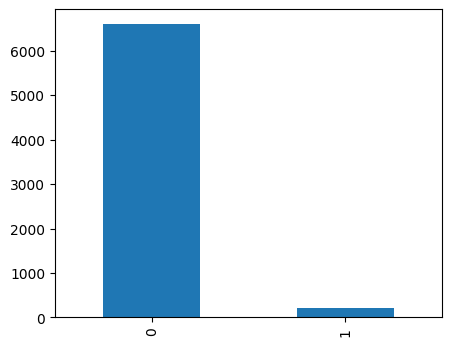

In [76]:
# Plot counts
df['Bankrupt?'].value_counts().plot.bar(figsize=(5, 4)) 
plt.show()

The next part of my Data Exploration was focused around understanding my targeted variable, which in this case was whether the company was bankrupt or not.

From the code and barchart above it is clear to see that there is a big imbalance in my data between companies that arent bankrupt and those that are. This is something that is huge for my machine learning models and something I am going to have to take into consideration before I run it through my models.

I can see that the number of companies that did not go bankrupt in my Data are 6599, and that accounts for around 96.7% of my Data. On the flip side, the number of companies that went bankrupt was 220, which is around 3.2% of my data, which is considerably less.

There are many ways that I can tackle this inbalance in the Data.
1. Removing columns to make them equal (downsampling)
2. Duplicating rows to make them equal (upsampling)
3. Using a technique called SMOTE - where essentially using the current data samples I have the function creates new samples using what we currently have in the minority class. (I will be focusing on this)

In [77]:
# understanding if any columns had <5 unique values
unique_counts = df.nunique()

# Filter columns with less than 5 unique values
filtered_columns = unique_counts[unique_counts < 5].index.tolist()

# Display the unique counts for these columns
for column in filtered_columns:
    print(f"Column '{column}' has {unique_counts[column]} unique value(s).")

Column 'Bankrupt?' has 2 unique value(s).
Column ' Liability-Assets Flag' has 2 unique value(s).
Column ' Net Income Flag' has 1 unique value(s).


The next part of my Data Exploration was around understanding columns and the types of unique values that each column had. I wanted to get a list of those columns that had less than 5 unique values. The idea behind this was to see if there was any columns that had only one unique value. If something has only one unique value then it would not help my machine learning model to determine whether the company was bankrupt or not. 

From above I can see that there are three columns that less than 5 unique values in the column. I expected to see the bankrupt column since this is my targeted variable. But the interesting one is the column called 'Net Income Flag'. This has only one unique value and is something that can be removed, which is what I do below.

In [78]:
# removing the 'Net Income Flag' column
df = df.drop(columns=[' Net Income Flag'])
df

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0             1                                           0.370594          
1             1                                           0.464291          
2             1                                           0.426071          
3             1                                           0.399844          
4             1                                           0.465022          
...         ...                                                ...          
6814          0                                           0.493687          
6815          0                                           0.475162          
6816          0                                           0.472725          
6817          0                                           0.506264          
6818          0                                           0.493053          

       ROA(A) before interest and % after tax  \
0                                    0.424389   
1                                    0.538214   
2                                    0.499019   
3                                    0.451265   
4                                    0.538432   
...                                       ...   
6814                                 0.539468   
6815                                 0.538269   
6816                                 0.533744   
6817                                 0.559911   
6818                                 0.570105   

       ROA(B) before interest and depreciation after tax  \
0                                              0.405750    
1                                              0.516730    
2                                              0.472295    
3                                              0.457733    
4                                              0.522298    
...                                                 ...    
6814                                           0.543230    
6815                                           0.524172    
6816                                           0.520638    
6817                                           0.554045    
6818                                           0.549548    

       Operating Gross Margin   Realized Sales Gross Margin  \
0                    0.601457                      0.601457   
1                    0.610235                      0.610235   
2                    0.601450                      0.601364   
3                    0.583541                      0.583541   
4                    0.598783                      0.598783   
...                       ...                           ...   
6814                 0.604455                      0.604462   
6815                 0.598308                      0.598308   
6816                 0.610444                      0.610213   
6817                 0.607850                      0.607850   
6818                 0.627409                      0.627409   

       Operating Profit Rate   Pre-tax net Interest Rate  \
0                   0.998969                    0.796887   
1                   0.998946                    0.797380   
2                   0.998857                    0.796403   
3                   0.998700                    0.796967   
4                   0.998973                    0.797366   
...                      ...                         ...   
6814                0.998992                    0.797409   
6815                0.998992                    0.797414   
6816                0.998984                    0.797401   
6817                0.999074                    0.797500   
6818                0.998080                    0.801987   

       After-tax net Interest Rate  \
0                         0.808809   
1                         0.809301   
2                         0.808388   
3                         0.808966   
4                         0.809304   
...                            ...   
6814                      0

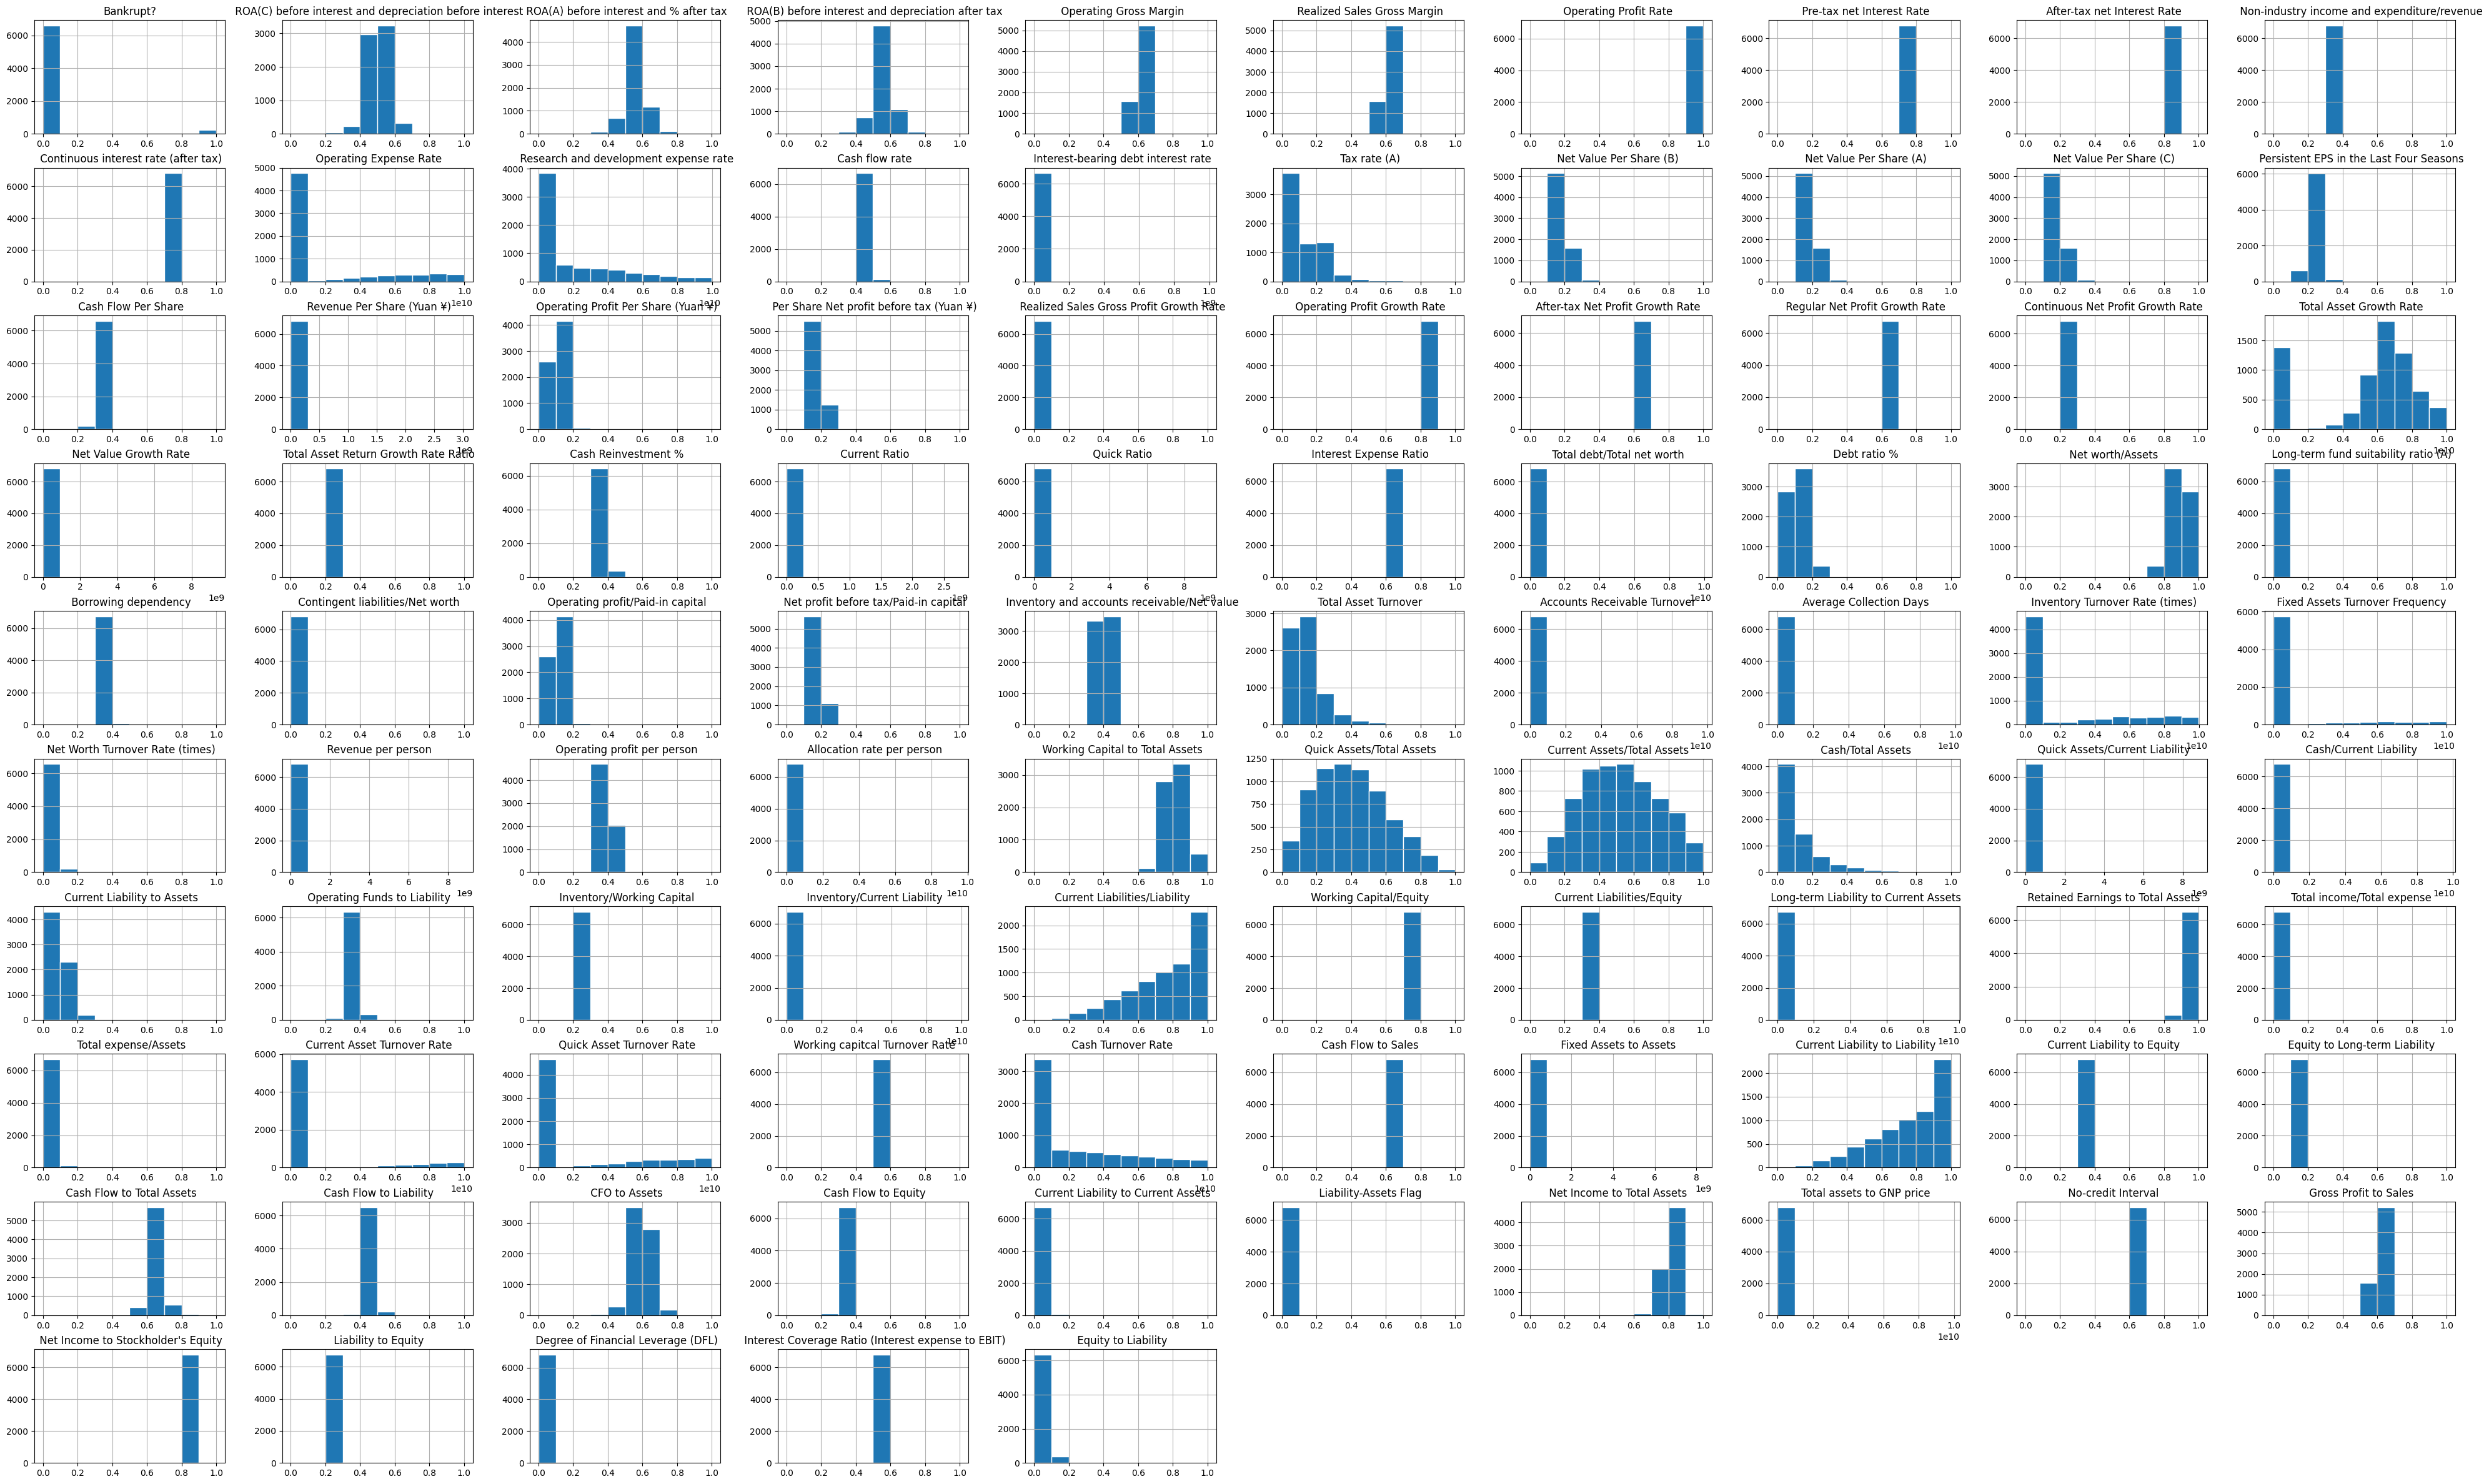

In [79]:
# producing a histogram to have a look at the distributions of my features.
df.hist(figsize=(50,30), edgecolor="white")
plt.savefig("Features Distribution - Histogram.pdf", format='pdf', bbox_inches='tight')
plt.show()

## 3. Creating Test/Train Split X and Y Variables ##

In [80]:
# Split dataframe into feature variable inputs 'X' dataframe, and output target variable 'y' Series
X = df.drop(['Bankrupt?'],axis=1)
y = df['Bankrupt?']

## 4. Feature Selection

From looking at the data I could see that there was around 95 features in this dataset.

This seemed like too much for this particular task and i decided to look at ways to reduce the number of features in my dataset

For this part I decided to run four different feature selection techniques (Chi-squared, F-test, Mutual Information and Extra Tree Classifier) to gain a well-rounded understanding of feature importance from multiple perspectives and allow me to compare the results between the different techniques.

In [81]:
chi2 = SelectKBest(score_func = chi2, k = 'all').fit(X,y)
chi2_sorted = pd.Series(data=chi2.scores_, index=X.columns).sort_values()
chi2_sorted

 Operating Profit Rate                      6.102672e-08
 Cash Flow to Sales                         2.030631e-07
 Working capitcal Turnover Rate             7.718998e-06
 Realized Sales Gross Profit Growth Rate    9.328172e-06
 Inventory/Working Capital                  9.789442e-06
                                                ...     
 Revenue per person                         8.633138e+10
 Fixed Assets Turnover Frequency            2.200229e+11
 Net Value Growth Rate                      2.421293e+11
 Fixed Assets to Assets                     2.495621e+11
 Cash/Current Liability                     2.901545e+11
Length: 94, dtype: float64

In [82]:
ftest = SelectKBest(score_func = f_classif, k = 'all').fit(X,y)
ftest_sorted = pd.Series(data=ftest.scores_, index=X.columns).sort_values()
ftest_sorted

 Operating Profit Rate                                        0.000360
 Realized Sales Gross Profit Growth Rate                      0.001432
 Cash Flow to Sales                                           0.001562
 Long-term Liability to Current Assets                        0.004130
 Inventory/Current Liability                                  0.004607
                                                               ...    
 Net worth/Assets                                           455.091151
 ROA(C) before interest and depreciation before interest    497.535121
 ROA(B) before interest and depreciation after tax          549.202093
 ROA(A) before interest and % after tax                     593.228629
 Net Income to Total Assets                                 753.348894
Length: 94, dtype: float64

In [83]:
mitest = SelectKBest(score_func = mutual_info_classif, k = 'all').fit(X,y)
mitest_sorted = pd.Series(data=mitest.scores_, index=X.columns).sort_values()
mitest_sorted

 Average Collection Days                     0.000000
 Current Asset Turnover Rate                 0.000000
 Long-term Liability to Current Assets       0.000000
 Inventory/Current Liability                 0.000000
 Current Assets/Total Assets                 0.000000
                                               ...   
 Per Share Net profit before tax (Yuan ¥)    0.037645
 Net profit before tax/Paid-in capital       0.039323
 Borrowing dependency                        0.039531
 Persistent EPS in the Last Four Seasons     0.040073
 Net Income to Stockholder's Equity          0.040483
Length: 94, dtype: float64

In [84]:
xtrees = ExtraTreesClassifier().fit(X, y)
xtrees_sorted = pd.Series(data=xtrees.feature_importances_, index=X.columns).sort_values()
xtrees_sorted

 Liability-Assets Flag                                      0.004575
 Regular Net Profit Growth Rate                             0.006192
 Tax rate (A)                                               0.006203
 Cash Flow to Liability                                     0.006921
 After-tax Net Profit Growth Rate                           0.006987
                                                              ...   
 ROA(C) before interest and depreciation before interest    0.019196
 Net Income to Stockholder's Equity                         0.019317
 Net worth/Assets                                           0.020435
 ROA(A) before interest and % after tax                     0.021295
 Net Income to Total Assets                                 0.025391
Length: 94, dtype: float64

Now that I have run multiple feature selection techniques it will be good to plot and get a visualisation of the features and see how they stack up against each other.

In [85]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(100, 100))
plt.subplots_adjust(wspace=0.6)

chi2_sorted.plot(kind='barh', ax=axes[0], title='Using chi2 score')
ftest_sorted.plot(kind='barh', ax=axes[1], title='Using FTest score')
# xtrees_sorted.plot(kind='barh', ax=axes[1, 1], title='Using ExtraTreesClassifier')
# mitest_sorted.plot(kind='barh', ax=axes[1, 0], title='Using MI Test score')

# Adjust font sizes for x and y labels
for ax in axes:
    ax.tick_params(axis='x', labelsize=50)  
    ax.tick_params(axis='y', labelsize=50)  
    ax.set_xlabel(ax.get_xlabel(), fontsize=50)  
    ax.set_ylabel(ax.get_ylabel(), fontsize=50)  
plt.show()

Visualise the corrlation between the features and the target variable 

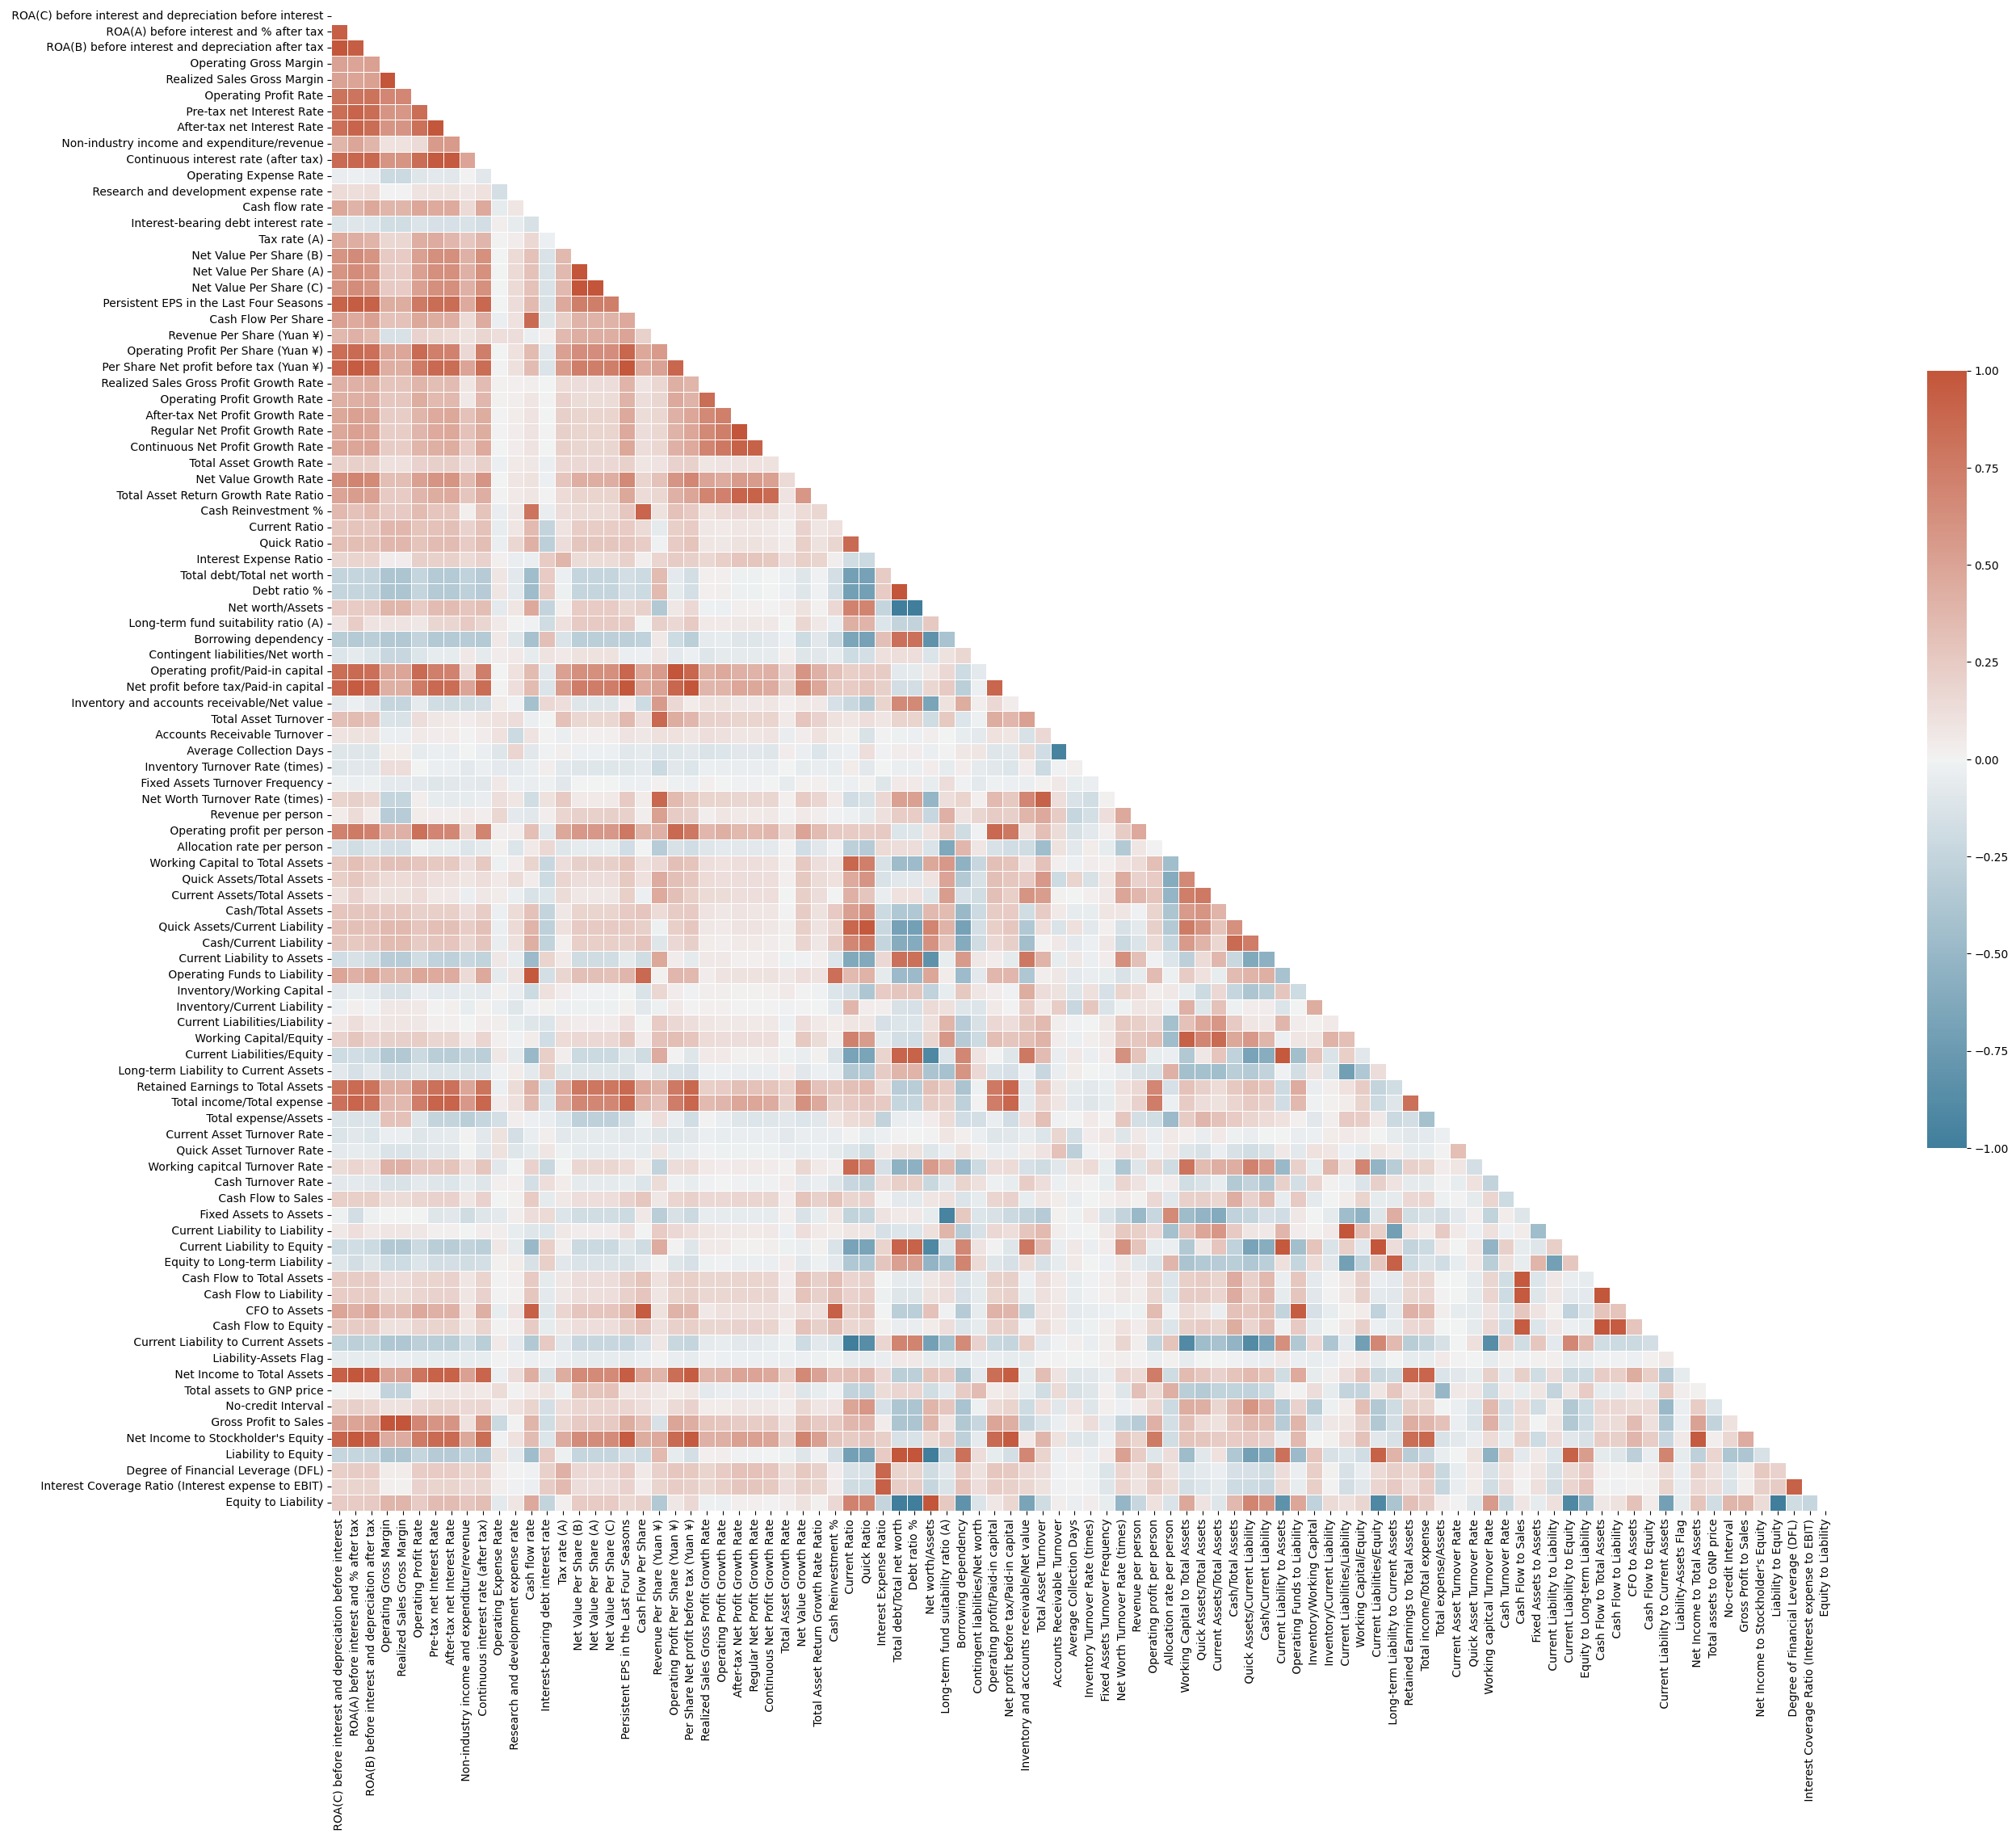

In [86]:
f, ax = plt.subplots(figsize=(30, 25))
mat = df.drop(columns="Bankrupt?").corr('spearman')
mask = np.triu(np.ones_like(mat, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(mat, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

Here I focus on PCA as a method to reduce my 95 features and look to see how many features I need in order to explain around 99% of the data.

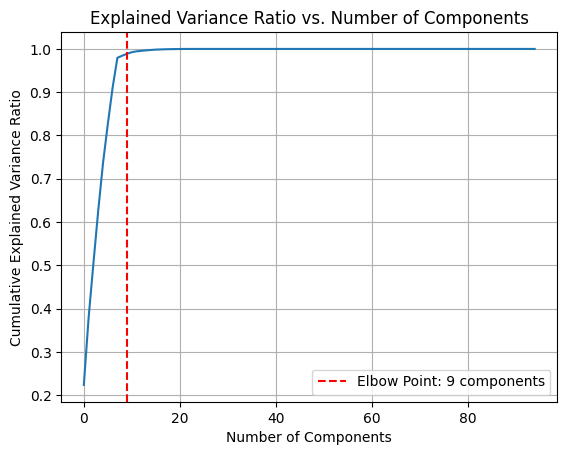

In [87]:
pca = PCA().fit(df)

# Plot explained variance ratio
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Components')
plt.grid(True)

# Finding the elbow point
explained_variance_ratio = pca.explained_variance_ratio_
diff = np.diff(explained_variance_ratio, 2)
elbow_point = np.argmax(diff) + 2  # Add 2 to account for zero-based indexing

# Mark the elbow point on the plot
plt.axvline(x=elbow_point, color='r', linestyle='--', label=f'Elbow Point: {elbow_point} components')
plt.legend()
plt.show()

## 5. Training and Evaluation

The two models that I decided that I would be using for this task were Logistic regression and Decision Trees. 

In [88]:
# Split dataframe into feature variable inputs 'X' dataframe, and output target variable 'y' Series
X = df.drop(['Bankrupt?'],axis=1)
y = df['Bankrupt?']

First model run will only focus on SMOTE, second model run will focus on SMOTE + PCA

In [89]:
def train_and_evaluate(model, X, y):
    print('\nResults from algorithm {}:'.format(model))
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    scaler = StandardScaler()
    X_train= scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    sm = SMOTE(random_state = 2) 
    X_train, y_train = sm.fit_resample(X_train, y_train.ravel()) 
    
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print('Mean cross-validation accuracy is {:.3f} with SD {:.3f}'
          .format(np.mean(scores), np.std(scores)))

    learnt_model = model.fit(X_train, y_train)
    print('\nAccuracy on training data is {:.3f}\n'.format(model.score(X_train, y_train)))

    y_pred = model.predict(X_test)
    print('Test data metrics: accuracy={:.3f}, f1={:.3f}, precision={:.3f}, recall={:.3f}'
          .format(accuracy_score(y_true=y_test, y_pred=y_pred),
                  f1_score(y_true=y_test, y_pred=y_pred),
                  precision_score(y_true=y_test, y_pred=y_pred),
                  recall_score(y_true=y_test, y_pred=y_pred)))
    
    cm = confusion_matrix(y_true=y_test, y_pred=y_pred, normalize = 'true')
    plt.figure(figsize=(4, 4))
    ax = sns.heatmap(cm,annot=True, fmt='g', xticklabels=['NB', 'B'], cbar=False,
                     yticklabels=['NB', 'B'], square=True,
                     linewidths=8.0)
    ax.set_xlabel('Predicted Bankruptcy Status')
    ax.set_ylabel('Actual Bankruptcy Status')
    plt.show()
    
    return learnt_model


## Logistic Regression ##


Results from algorithm LogisticRegression():
Mean cross-validation accuracy is 0.904 with SD 0.004

Accuracy on training data is 0.906

Test data metrics: accuracy=0.868, f1=0.286, precision=0.179, recall=0.706


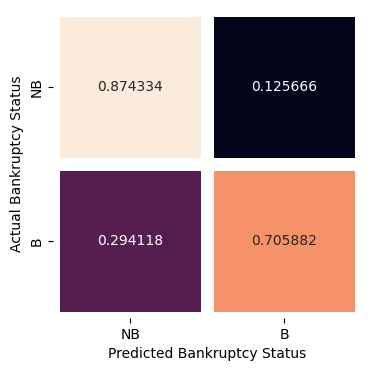

In [90]:
_ = train_and_evaluate(LogisticRegression(), X, y)

## Decision Tree ##


Results from algorithm DecisionTreeClassifier():
Mean cross-validation accuracy is 0.953 with SD 0.006

Accuracy on training data is 1.000

Test data metrics: accuracy=0.924, f1=0.280, precision=0.217, recall=0.392


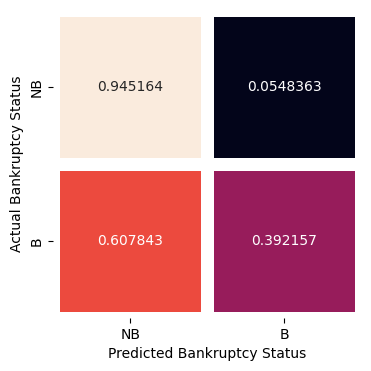

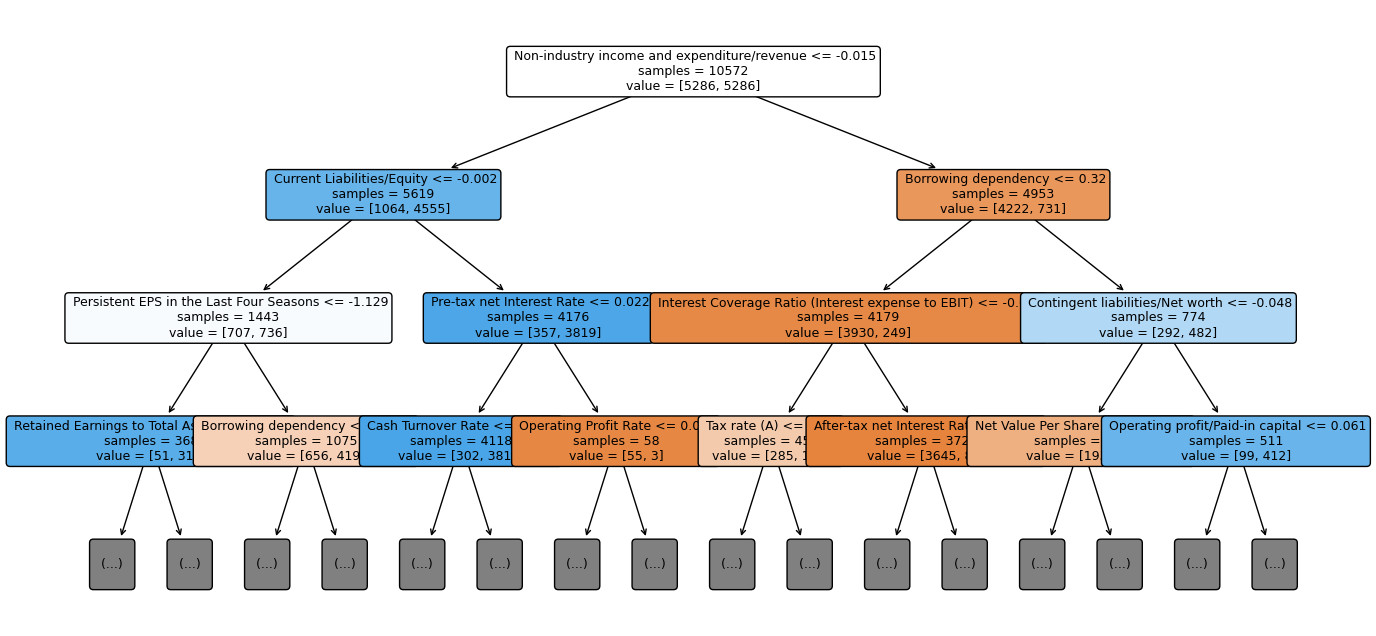

In [91]:
learnt_model = train_and_evaluate(DecisionTreeClassifier(), X, y)

plt.figure(figsize=(16, 8))
plot_tree(learnt_model, max_depth=3, feature_names=list(X.columns),
          fontsize=9, filled=True, impurity=False, rounded=True)
plt.show()

## Best Hyperparameter 

In [92]:
def train_model(algorithm, hyperparams, X, y):
    model = algorithm(**hyperparams)
    scores = cross_val_score(model, X, y, cv=10, scoring='accuracy')
    learnt_model = model.fit(X, y)
    return (np.mean(scores), learnt_model)

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

sm = SMOTE(random_state = 2) 
X_train, y_train = sm.fit_resample(X_train, y_train.ravel()) 

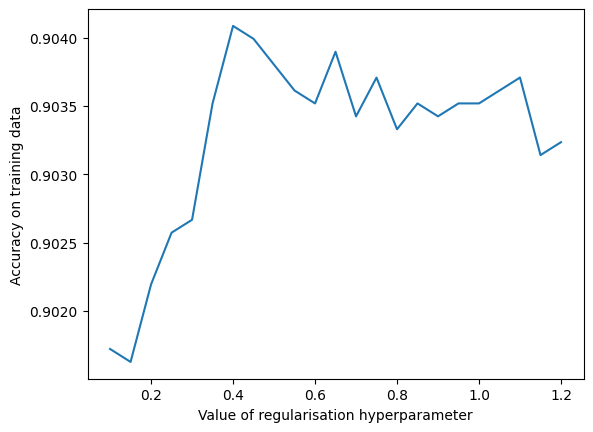

In [95]:
# Let's try a range of regularisation strengths 0.1, 0.15 ... 1.2
reg_values = [0.05 * i for i in range(2, 25)]
reg_accuracy = []
for reg_strength in reg_values:
    acc, _ = train_model(LogisticRegression, {'C': reg_strength}, X_train, y_train)
    reg_accuracy.append(acc)

# Plot the results

plt.plot(reg_values, reg_accuracy) #plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.ylabel('Accuracy on training data')
plt.xlabel('Value of regularisation hyperparameter')
plt.show()


From the above we can see that the best hyperparameter value is 0.4 since it gives the highest accuracy on the training data. Therefore, we are going to retrin the model and give it the 0.4 hyperparameter and see how it performs on the test data

Test data metrics: accuracy=0.871, f1=0.296, precision=0.186, recall=0.725


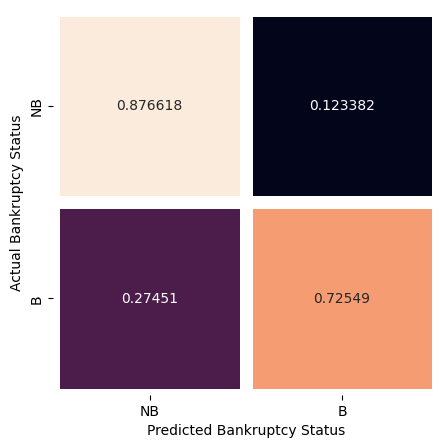

In [ ]:
train_accuracy, best_model = train_model(LogisticRegression, {'C': 0.4}, X_train, y_train)

y_pred = best_model.predict(X_test)
print('Test data metrics: accuracy={:.3f}, f1={:.3f}, precision={:.3f}, recall={:.3f}'
      .format(accuracy_score(y_true=y_test, y_pred=y_pred),
              f1_score(y_true=y_test, y_pred=y_pred),
              precision_score(y_true=y_test, y_pred=y_pred),
              recall_score(y_true=y_test, y_pred=y_pred)))
    
# confusion matrix  
cm = confusion_matrix(y_true=y_test, y_pred=y_pred, normalize = 'true')
plt.figure(figsize=(5, 5))
ax = sns.heatmap(cm,annot=True, fmt='g', xticklabels=['NB', 'B'], cbar=False,
                 yticklabels=['NB', 'B'], square=True,
                 linewidths=8.0) 
ax.set_xlabel('Predicted Bankruptcy Status')
ax.set_ylabel('Actual Bankruptcy Status')
plt.show()

2. Run the models with the data avaliable + now apply PCA and only do it on the 9 features that explain 99% of the data

In [98]:
def train_and_evaluate_2(model, X, y):
    print('\nResults from algorithm {}:'.format(model))
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    sm = SMOTE(random_state = 2) 
    X_train, y_train = sm.fit_resample(X_train, y_train.ravel()) 

    pca = PCA(n_components=9)
    X_train = pca.fit_transform(X_train)
    X_test = pca.transform(X_test)
    
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print('Mean cross-validation accuracy is {:.3f} with SD {:.3f}'
          .format(np.mean(scores), np.std(scores)))

    learnt_model = model.fit(X_train, y_train)
    print('\nAccuracy on training data is {:.3f}\n'.format(model.score(X_train, y_train)))

    y_pred = model.predict(X_test)
    print('Test data metrics: accuracy={:.3f}, f1={:.3f}, precision={:.3f}, recall={:.3f}'
          .format(accuracy_score(y_true=y_test, y_pred=y_pred),
                  f1_score(y_true=y_test, y_pred=y_pred),
                  precision_score(y_true=y_test, y_pred=y_pred),
                  recall_score(y_true=y_test, y_pred=y_pred)))
    
    cm = confusion_matrix(y_true=y_test, y_pred=y_pred, normalize = 'true')
    plt.figure(figsize=(4, 4))
    ax = sns.heatmap(cm,annot=True, fmt='g', xticklabels=['NB', 'B'], cbar=False,
                     yticklabels=['NB', 'B'], square=True,
                     linewidths=8.0)
    ax.set_xlabel('Predicted Bankruptcy Status')
    ax.set_ylabel('Actual Bankruptcy Status')
    plt.show()
    
    return learnt_model


## Logistic Regression ##


Results from algorithm LogisticRegression():
Mean cross-validation accuracy is 0.616 with SD 0.009

Accuracy on training data is 0.618

Test data metrics: accuracy=0.635, f1=0.120, precision=0.066, recall=0.667


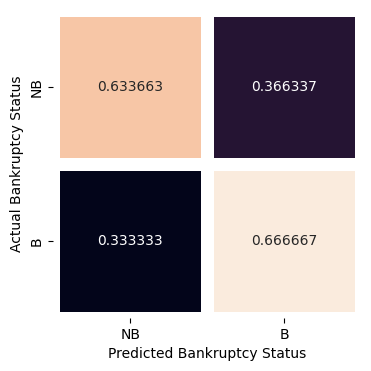

In [99]:
_ = train_and_evaluate_2(LogisticRegression(), X, y)

## Decision Tree ##


Results from algorithm DecisionTreeClassifier():
Mean cross-validation accuracy is 0.898 with SD 0.003

Accuracy on training data is 1.000

Test data metrics: accuracy=0.869, f1=0.152, precision=0.100, recall=0.314


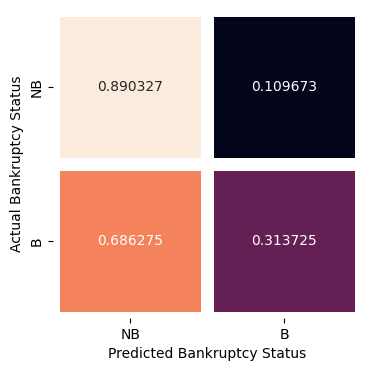

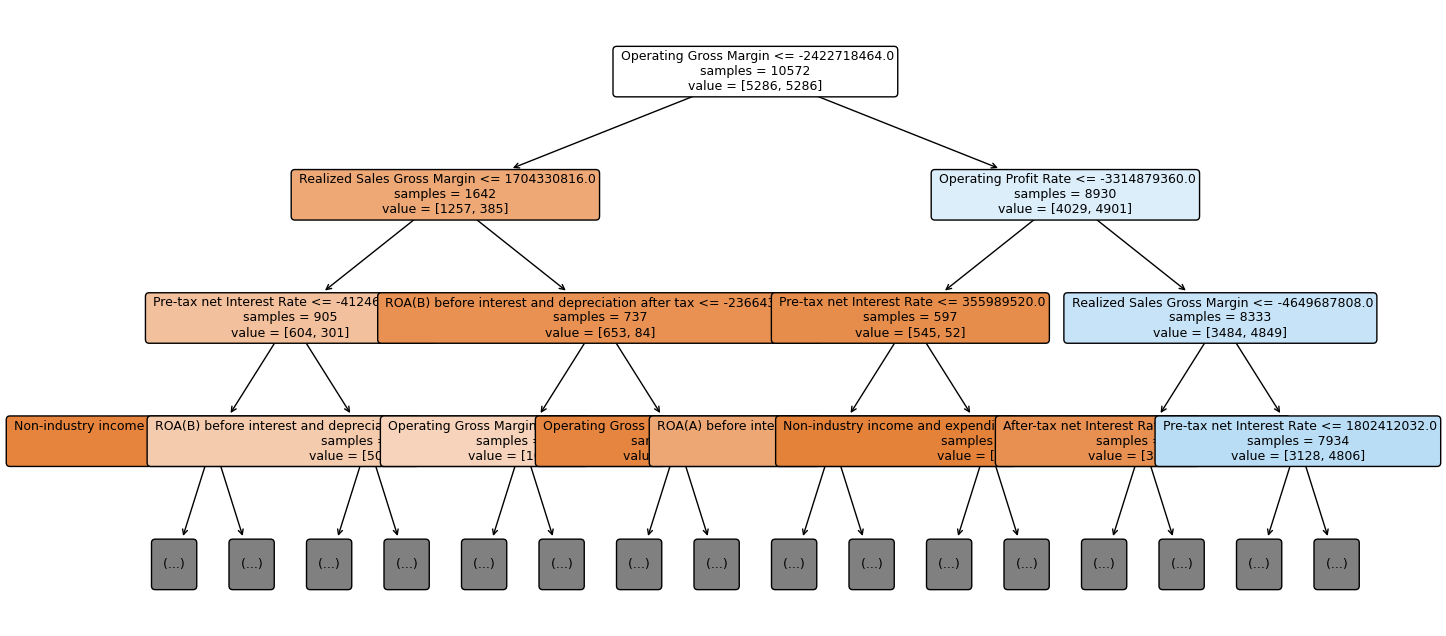

In [100]:
learnt_model = train_and_evaluate_2(DecisionTreeClassifier(), X, y)
plt.figure(figsize=(16, 8))
plot_tree(learnt_model, max_depth=3, feature_names=list(X.columns),
          fontsize=9, filled=True, impurity=False, rounded=True)
plt.show()